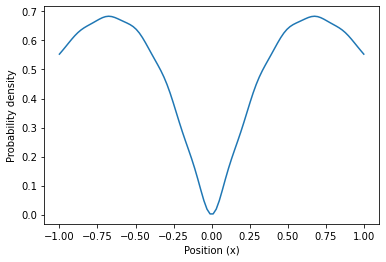

In [243]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

def initial_wavefunction(x, L, N):
    psi = np.zeros_like(x)
    for n in range(1, N+1):
        psi += np.sqrt(2/L) * np.sin(n * np.pi * x / L) / n**2 # Superposition of stationary states
    psi /= np.sqrt(np.trapz(abs(psi)**2, x)) # Normalize the wave function
    return psi

L = 2
N = 20
x = np.linspace(-L/2, L/2, 100)
psi_initial = initial_wavefunction(x, L, N)
# print(psi_initial)

plt.plot(x, abs(psi_initial)**2)
plt.xlabel('Position (x)')
plt.ylabel('Probability density')
plt.show()

In [39]:
import sympy as sym
x, L, psi = sym.symbols('x L psi')
abs_psi = sym.Abs(psi)**2
integral = sym.integrate(abs_psi, (x, 0, L))
C = sym.sqrt(integral)
psi_normalized = psi / C
# print(sym.latex(C)) 
# print(sym.latex(psi_normalized))

In [40]:
from IPython.display import display, Latex
display(Latex(f"The normalization constant is $C = {sym.latex(C)}$"))
display(Latex(f"The normalized wave function is $\\psi(x) = {sym.latex(psi_normalized)}$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

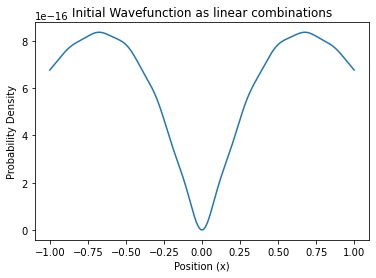

In [215]:

def psi_n(n, x):
    return np.sqrt(2.0 / L) * np.sin(n * np.pi * x / L) # nth stationary state in box lenght L

def c_n(n):
    return np.sqrt(2.0 / L) * np.sin(n * np.pi / 2.0) # expansion of coefficients

def initial_wavefunction(x, L, N):
    psi = np.zeros_like(x)
    for n in range(1, N+1):
        psi += np.sqrt(2/L) * np.sin(n * np.pi * x / L) / n**2 # Superposition of stationary states
    psi /= np.sqrt(np.trapz(abs(psi)**2, x)) # Normalize the wave function
    return psi

# psi_0 += c_n(n) * initial_wavefunction(x,L, N) was not right giving me a weird looking graph 

# Plot the initial wavefunction
x = np.linspace(-L/2, L/2, 1000)
n = 20
c = c_n(n)
L = 2
N = 20
psi_initial = initial_wavefunction(x, L, N)
plt.plot(x, np.abs((psi_initial**2)*c))
# print(np.abs((psi_initial**2)*c))
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.title('Initial Wavefunction as linear combinations')
plt.show()


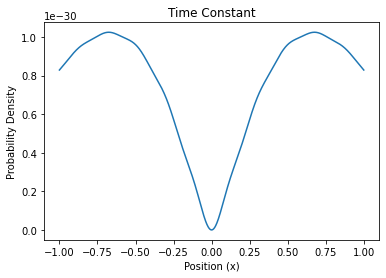

In [217]:
hbar = 1.0545718e-34
m = 1
E_n = []
t = 0
for i in range(0,21):
    E_n.append(((i**2)*((np.pi)**2)*(hbar**2))/2*m*(L**2))
# print(E_n)
for j in range(0, len(E_n)):
    
    time_constant = np.exp(((-(-1)**2)*E_n[j]*t)/hbar)
# print(time_constant)

psi_t = c*psi_initial*time_constant
plt.plot(x, np.abs(psi_t**2))
plt.xlabel('Position (x)')
plt.ylabel('Probability Density')
plt.title('Time Constant')
plt.show()


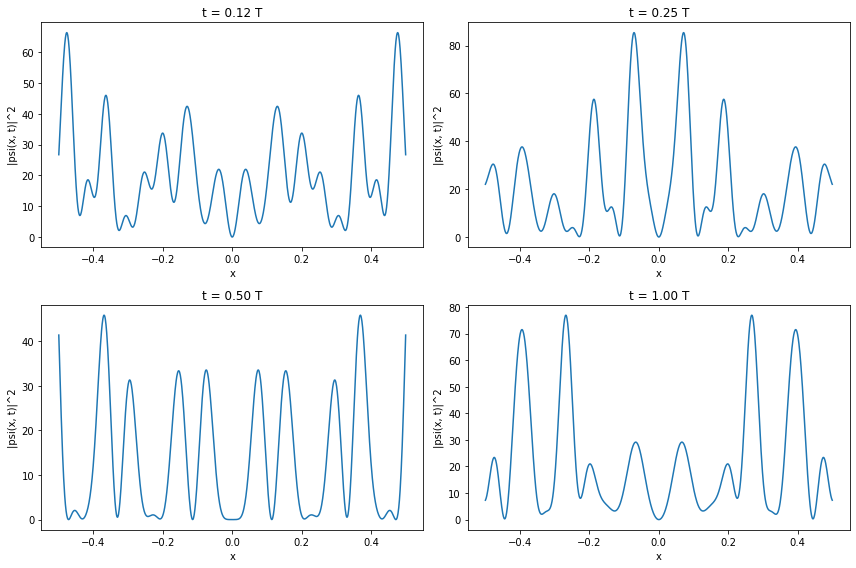

In [299]:
n_max = 20
T = (4*m*L**2)/(np.pi*hbar)
x = np.linspace(-L/2, L/2, 1000)

def psi(x, n_max):
    psi_sum = 0
    for n in range(1, n_max+1):
        psi_n = np.sqrt(2/L) * np.sin(n*np.pi*x/L)
        psi_sum += psi_n
    return psi_sum

def psi_t(x, t, n_max):
    psi_sum_t = 0
    for n in range(1, n_max+1):
        E_n = n**2 * np.pi**2 / (2 * L**2)
        psi_n = np.sqrt(2/L) * np.sin(n*np.pi*x/L) * np.exp(-1j*E_n*t)
        psi_sum_t += psi_n
    return psi_sum_t

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

t_list = [T/8, T/4, T/2, T]

for i in range(len(t_list)):
    t = t_list[i]
    psi_t_mod_sq = np.abs(psi_t(x, t, n_max))**2
    axs[i//2, i%2].plot(x, psi_t_mod_sq)
    axs[i//2, i%2].set_xlabel('x')
    axs[i//2, i%2].set_ylabel('|psi(x, t)|^2')
    axs[i//2, i%2].set_title(f't = {t/T:.2f} T')

plt.tight_layout()
plt.show()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

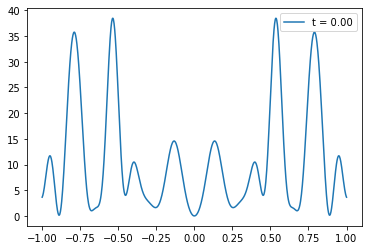

In [296]:
num_frames = 100
dt = T / num_frames
# print(dt)

# timesteps = np.linspace(0, dt, 200)


fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
line, = ax.plot([], [], lw=2)

def animate(frame):      
    ax.clear()
    ax.plot(x,psi_t_mod_sq , label='t = {:.2f}'.format(frame * dt))
    ax.legend()
    ax.set_ylim(0, 1.2 * psi_t_mod_sq)
    ax.set_xlabel('x')
    ax.set_ylabel('|psi(x)|^2')
    ax.set_title('Particle in a box: time evolution of wavefunction')
# frames = int(dt)
ani = FuncAnimation(fig, animate, frames=num_frames, interval=50, blit=True)
plt.show()